In [1]:
def f(x):
    return 3*x+5

In [2]:
start = -1
stop = 1
step = 0.0001
x = [start + i*step for i in range(int((stop-start)/step))]


In [3]:
import random
y = [f(i)+ 0.01*random.random() for i in x]

In [4]:
len(x)

20000

In [5]:
data = list(zip(x, y))

In [57]:
random.sample(data, 3)

[(4.268000000000001, 17.810373742569226),
 (-11.214, -28.619709693293807),
 (-5.068, -10.182464304127572)]

In [26]:
a = 1; b = 2

In [11]:
from micrograd.engine import Value

In [58]:
len(data)

20000

In [9]:
batch_size = 5

In [10]:
batch = random.sample(data, batch_size)

In [34]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [35]:
dot = draw_dot(loss)

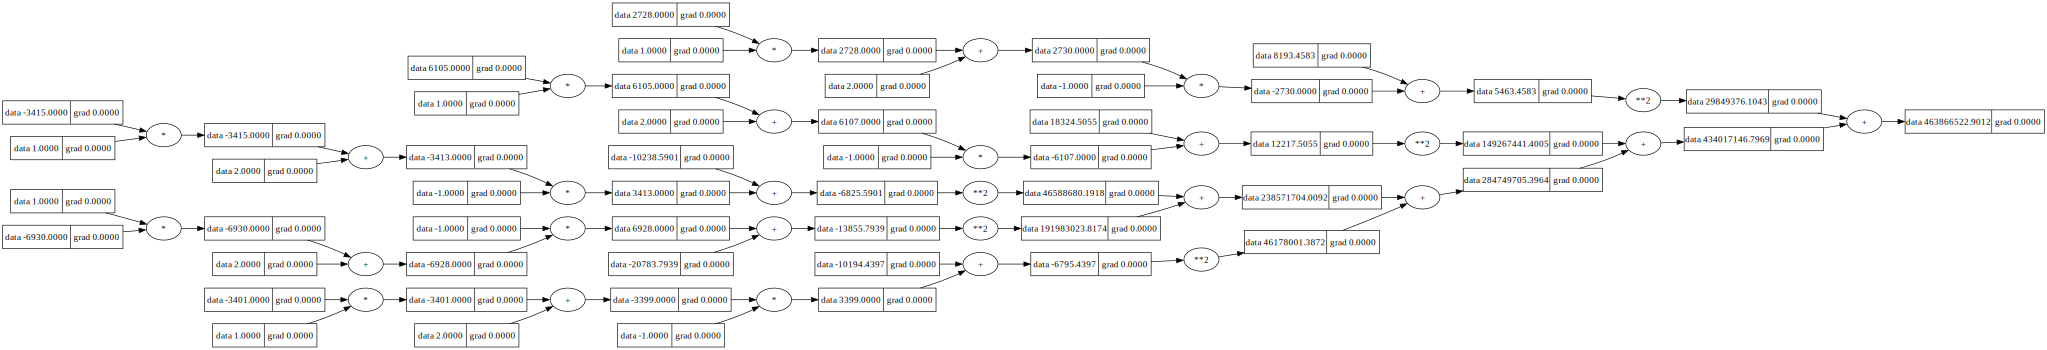

In [36]:
dot

In [37]:
loss.backward()

In [38]:
dot = draw_dot(loss)

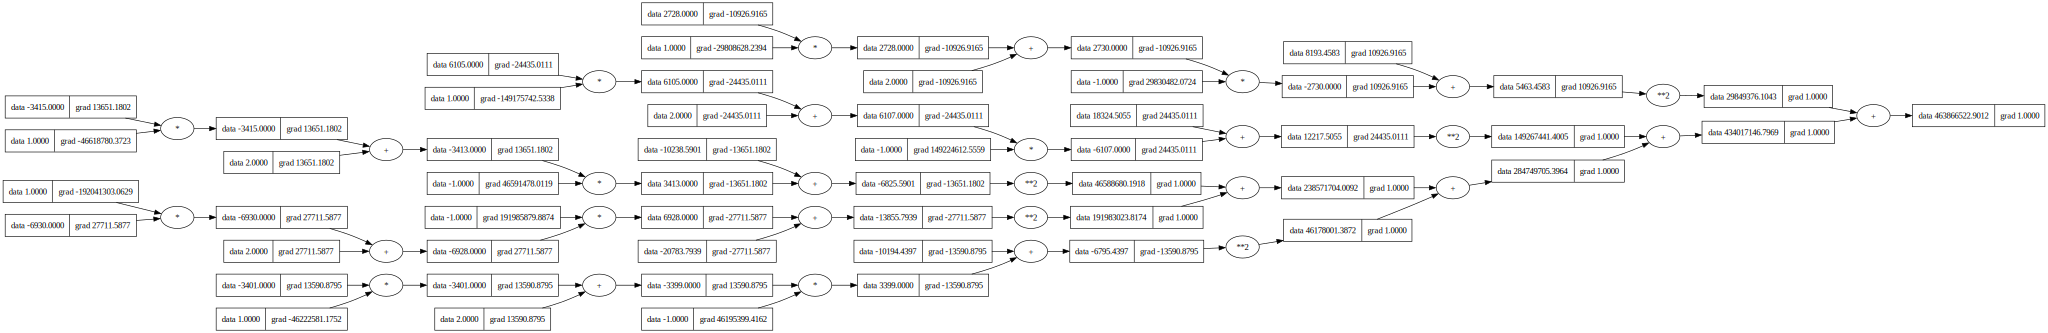

In [39]:
dot

In [14]:
a = 1; b= 2
a, b = [Value(a), Value(b)]
batch_size = 200

lr = 0.01

for i in range(1000):
    loss = None
    batch = random.sample(data, batch_size)
    for item in batch:
        x, y = item
        x = Value(x)
        y = Value(y)
        y_pred = a*x + b
        #print('pred:', y_pred.data, 'y', y.data)
        if not loss:
            loss = (y - y_pred)**2
        else:
            loss += (y - y_pred)**2
    loss = loss /batch_size
    #print('loss.grad', loss.grad)
    loss.backward()
    print('a.grad', a.grad, 'b.grad', b.grad,)
    a.data -= lr * a.grad
    b.data -= lr * b.grad
    a.grad = 0
    b.grad = 0
    
    print('a:', a.data, 'b:', b.data, 'loss:', loss.data)

a.grad -1.1113655204000006 b.grad -5.865323999999999
a: 1.011113655204 b: 2.05865324 loss: 9.909351520399998
a.grad -1.3537135085127674 b.grad -5.90622602323163
a: 1.0246507902891278 b: 2.117715500232316 loss: 10.03232054455348
a.grad -1.188280240508628 b.grad -5.708403895455655
a: 1.036533592694214 b: 2.1747995391868726 loss: 9.400256250144539
a.grad -1.481333749053701 b.grad -5.718984803233446
a: 1.0513469301847511 b: 2.231989387219207 loss: 9.532913777876841
a.grad -0.9610869689504866 b.grad -5.35481597659947
a: 1.060957799874256 b: 2.2855375469852017 loss: 8.347506262560136
a.grad -1.409151592577178 b.grad -5.5582842283265865
a: 1.0750493158000278 b: 2.3411203892684678 loss: 8.910079122679203
a.grad -1.1834647604012156 b.grad -5.201168808422441
a: 1.08688396340404 b: 2.3931320773526923 loss: 8.053696498474064
a.grad -1.6402072821677771 b.grad -5.608096019498325
a: 1.1032860362257177 b: 2.4492130375476755 loss: 8.878736237606438
a.grad -1.4905764173461191 b.grad -5.247656937680581
a

In [13]:
a


Value(data=669032.2427759061, grad=0)

In [14]:
b

Value(data=-24.22565269350488, grad=0)

In [16]:
x

Value(data=-3261, grad=0)

In [17]:
y

Value(data=-9774.364069610747, grad=0)

In [27]:
batch[:10]

[(-8169, -24500.89758637621),
 (1140, 3426.9268117927877),
 (3419, 10264.044984267815),
 (9413, 28247.191066052514),
 (-7609, -22820.448951508097),
 (5999, 18005.269577662042),
 (3854, 11568.867379251782),
 (-125, -369.660489866932),
 (8706, 26126.192084042927),
 (2706, 8123.811410291625)]